In [1]:
 %matplotlib inline
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

## The Dataset is read from saved pickle object dataframe.pkl
    1. The column CURRENT LOAN DELINQUENCY STATUS is measure of no of days a loan is behind , hence non-performing.
    2. The following exercise plots the values of a feature against the CURRENT LOAN DELINQUENCY STATUS to see the   relationships.

#### Get dataframe for pickle object

In [2]:
dfWithG=pd.read_pickle('data/dataframe.pkl')
dfWithG2=pd.read_pickle('data/dataframe.pkl')

In [3]:
def groupInterestRate(var):
    if 0< var <1:
        return 0.5
    if 1< var <2:
        return 1.5
    if 2< var <3:
        return 2.5
    if 3< var <4:
        return 3.5
    if 4< var <5:
        return 4.5
    if 5< var <6:
        return 5.5
    if 6< var <7:
        return 6.5
    if 7< var <8:
        return 7.5
    if 8< var <9:
        return 9.5
    else:
        return 10
        

In [4]:
def groupDTIRatio(var):
    if 0< var <10:
        return 5
    if 10< var <20:
        return 15
    if 20< var <30:
        return 25
    if 30< var <40:
        return 35
    if 40< var <50:
        return 45
    if 50< var <60:
        return 55
    if 60< var <70:
        return 65
    if 70< var <80:
        return 75
    if 80< var <90:
        return 85
    if 90< var <100:
        return 95
    else:
        return 100

#### Measure data for each year-quarter time period.

In [5]:
dfWithG.groupby(['year','quarter']).size()

year  quarter
2009  1          109821
      2          104164
      3           98555
      4           94669
2010  1           91270
      2           88135
      3           84794
      4           81110
2011  1           77434
      2           74257
      3           71703
      4           69015
2012  1           66050
      2           63191
      3           60425
      4           57650
2013  1           54749
      2           51600
      3           48737
      4           46422
2014  1           44689
dtype: int64

#### Peek into data

In [6]:
dfWithG.head()

,LOAN SEQUENCE NUMBER,MONTHLY REPORTING PERIOD,CURRENT ACTUAL UPB,CURRENT LOAN DELINQUENCY STATUS,REMAINING MONTHS TO LEGAL MATURITY,REPURCHASE FLAG,MODIFICATION FLAG,ZERO BALANCE CODE,CURRENT INTEREST RATE,CURRENT DEFERRED UPB,year,quarter,CREDIT SCORE,FIRST TIME HOMEBUYER FLAG,MORTGAGE INSURANCE PERCENTAGE,CLTV,DTI Ratio,change-current,change-chained
0,F199Q1000002,2009-01-01,99584.031250,0,247,F,N,00,6.3,0.0,2009,1,733,N,000,51.0,0.0,-4.5,-5.4
1,F199Q1000002,2009-02-01,99386.359375,0,246,F,N,00,6.3,0.0,2009,1,733,N,000,51.0,0.0,-4.5,-5.4
2,F199Q1000002,2009-03-01,99187.648438,0,245,F,N,00,6.3,0.0,2009,1,733,N,000,51.0,0.0,-4.5,-5.4
3,F199Q1000016,2009-01-01,192371.562500,0,242,F,N,00,6.0,0.0,2009,1,738,N,000,73.0,44.0,-4.5,-5.4
4,F199Q1000016,2009-02-01,191958.671875,0,241,F,N,00,6.0,0.0,2009,1,738,N,000,73.0,44.0,-4.5,-5.4


### Get data for a given year quarter 

In [7]:
dfWithG=dfWithG[(dfWithG['year']==2013) & (dfWithG['quarter']==4)]


#### CREDIT SCORE vs NON PERFORMING LOAN correlation

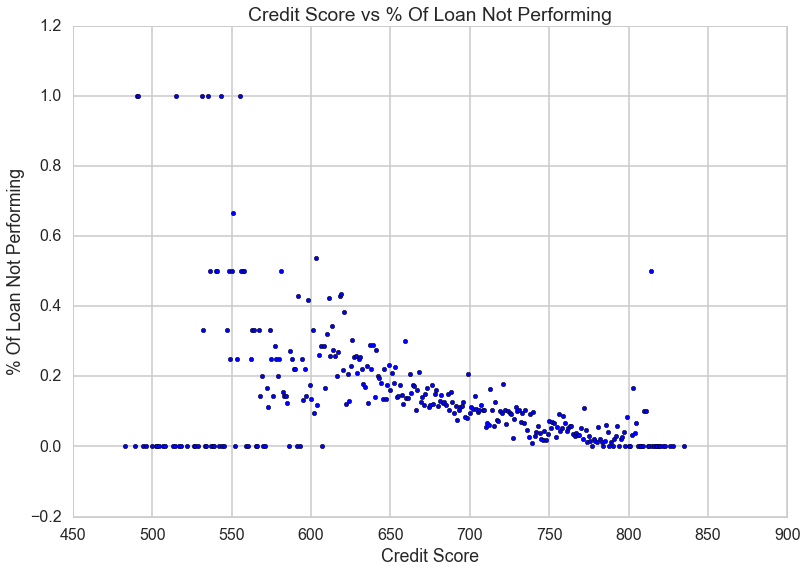

In [8]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CREDIT SCORE','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df2['PERFORMING']=[0 if x==0 else 1 for x in df2['CURRENT LOAN DELINQUENCY STATUS']]
df3=df2.reset_index()
df3=df3[['CREDIT SCORE','PERFORMING']]
#df3=df3.sample(frac=.50)
df3=df3.groupby('CREDIT SCORE').mean()
df3=df3.reset_index()

plt.scatter(df3['CREDIT SCORE'],df3['PERFORMING'])
plt.xlabel('Credit Score')
plt.ylabel('% Of Loan Not Performing')
plt.title('Credit Score vs % Of Loan Not Performing')
plt.xlim(400,850)
plt.autoscale()

#### Combined Loan to Value Ratio (LTV) VS NON PERFORMING LOAN correlation

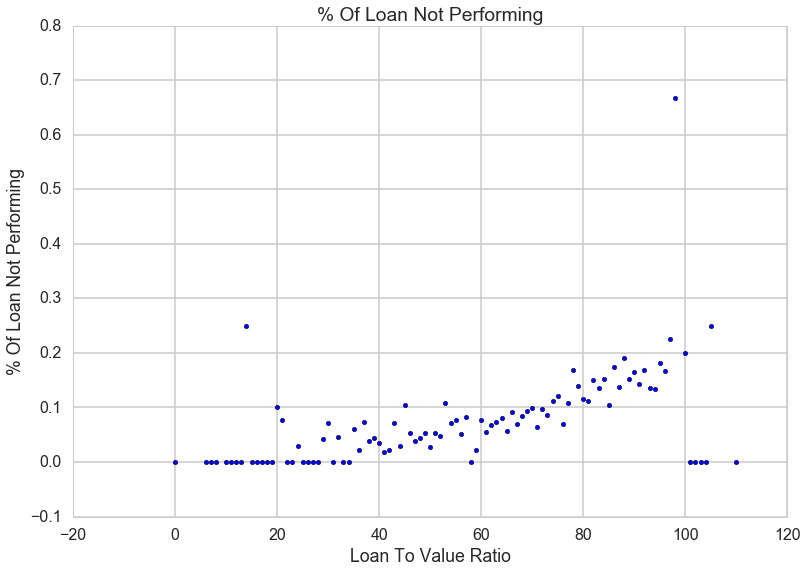

In [9]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CLTV','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df2['PERFORMING']=[0 if x==0 else 1 for x in df2['CURRENT LOAN DELINQUENCY STATUS']]
df3=df2.reset_index()
df3=df3[['CLTV','PERFORMING']]
df3=df3.groupby('CLTV').mean()
df3=df3.reset_index()
plt.scatter(df3['CLTV'],df3['PERFORMING'])
plt.xlabel('Loan To Value Ratio')
plt.ylabel('% Of Loan Not Performing')
plt.title('% Of Loan Not Performing')

plt.autoscale()


#### INTEREST RATES VS NON PERFORMING LOAN correlation

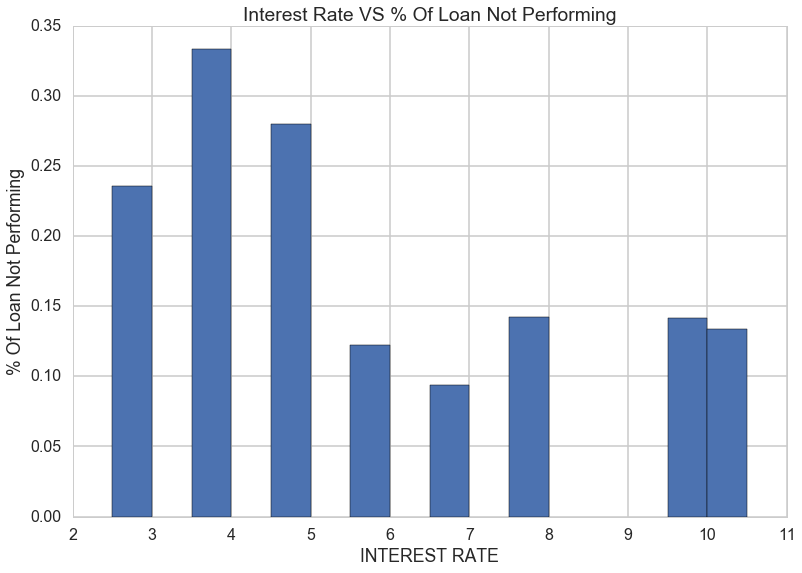

In [10]:
import seaborn as sns
df1=dfWithG[['LOAN SEQUENCE NUMBER','CURRENT INTEREST RATE','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df2['PERFORMING']=[0 if x==0 else 1 for x in df2['CURRENT LOAN DELINQUENCY STATUS']]
df3=df2.reset_index()
df3=df3[['CURRENT INTEREST RATE','PERFORMING']]
df3['CURRENT INTEREST RATE']=df3['CURRENT INTEREST RATE'].apply(groupInterestRate);
df4=df3.groupby('CURRENT INTEREST RATE',sort=True).mean()
df4=df4.reset_index()
plt.bar(df4['CURRENT INTEREST RATE'],df4['PERFORMING'],width=0.5)
plt.xlabel('INTEREST RATE')
plt.ylabel('% Of Loan Not Performing')
plt.title('Interest Rate VS % Of Loan Not Performing')
plt.xlim(1,9)
plt.autoscale()

#### DEBT TO INCOME RATIO (DTI) VS NON PERFORMING LOAN correlation

(1, 80)

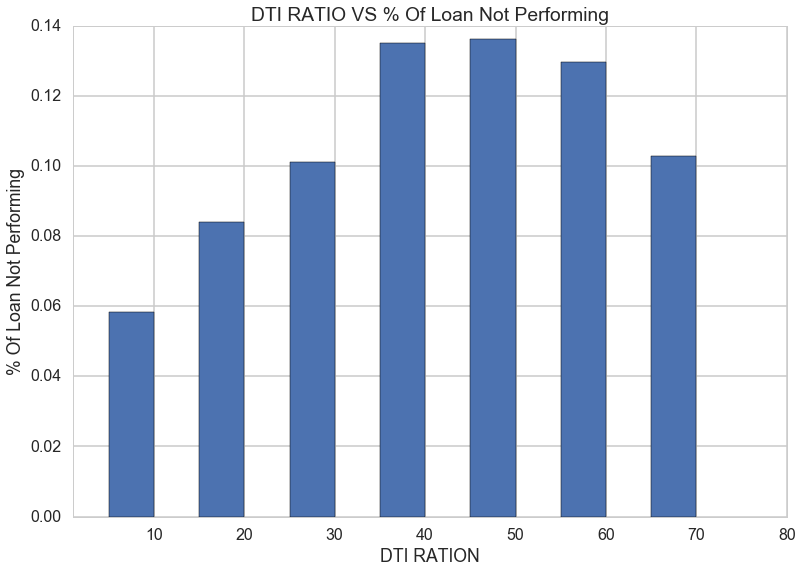

In [11]:

df1=dfWithG[['LOAN SEQUENCE NUMBER','DTI Ratio','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df2['PERFORMING']=[0 if x==0 else 1 for x in df2['CURRENT LOAN DELINQUENCY STATUS']]
df3=df2.reset_index()
df3=df3[['DTI Ratio','PERFORMING']]
df3['DTI Ratio']=df3['DTI Ratio'].apply(groupDTIRatio);
df4=df3.groupby('DTI Ratio',sort=True).mean()
df4=df4.reset_index()
plt.bar(df4['DTI Ratio'],df4['PERFORMING'],width=5)
plt.xlabel('DTI RATION')
plt.ylabel('% Of Loan Not Performing')
plt.title('DTI RATIO VS % Of Loan Not Performing')
plt.xlim(1,80)
#plt.autoscale()

#### Mondification Flag and LOAN DELINQUENCY STATUS relationship

15684
28
15656


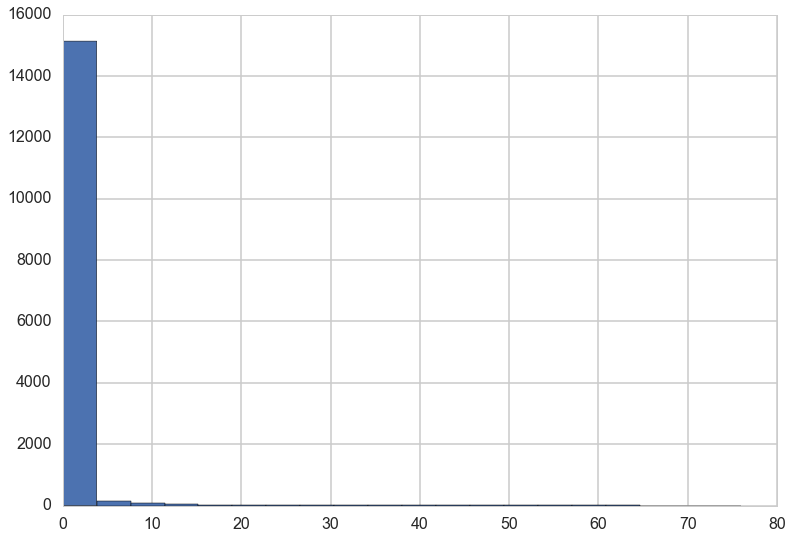

In [12]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','MODIFICATION FLAG','CURRENT LOAN DELINQUENCY STATUS']]
#df1=df1[df1['MODIFICATION FLAG']=='N']
df2=df1.groupby('LOAN SEQUENCE NUMBER').max().reset_index()
df3=df2[['MODIFICATION FLAG','CURRENT LOAN DELINQUENCY STATUS']]
print (len(df3))
df4=df3[df3['MODIFICATION FLAG']=='Y']
print (len(df4))
df5=df3[df3['MODIFICATION FLAG']=='N']
print (len(df5))
plt.hist(df5['CURRENT LOAN DELINQUENCY STATUS'],20)
plt.autoscale()